# BEST MODEL!!

### SVM

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from preprocess import Preprocess
import pandas as pd

import matplotlib.pyplot as plt

Preprocess_pipeline = {
    "drop": {
        "labels": ["찰스강경계여부", "ID", "인당_범죄율"],
        "axis": 1,
    },

    "get_polynormial_features": {
        "degree": 3,
        "exclude": ["주택가격"]
    },

    "scale": {
        "method": "MinMaxScaler",
        "exclude": ["주택가격"],
    }
}

prep = Preprocess(pd.read_csv("./data/boston/train.csv"), categorial_threshold=30)

prep.data = pd.concat([prep.data, pd.Series([1 if x >= 1 else 0 for x in prep.data["인당_범죄율"]], name="인당_범죄율_1이상")], axis=1)
prep.set_pipeline(Preprocess_pipeline)
prep.execute_pipeliine()

X_train, X_test, y_train, y_test = prep.train_test_split("주택가격", test_size=0.2, stratify=False)


In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

svr = SVR(kernel="rbf", C=9950, gamma=0.0001, tol=1e-10)

svr.fit(X_train, y_train)
mean_squared_error(y_test, svr.predict(X_test))

### RandomForestRegressor

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from preprocess import Preprocess
import pandas as pd

import matplotlib.pyplot as plt

Preprocess_pipeline = {
    "drop": {
        "labels": ["찰스강경계여부", "ID", "인당_범죄율"],
        "axis": 1,
    },

    "get_polynormial_features": {
        "degree": 5,
        "exclude": ["주택가격"]
    },

    "scale": {
        "method": "RobustScaler",
        "exclude": ["주택가격"],
    }
}

prep = Preprocess(pd.read_csv("./data/boston/train.csv"), categorial_threshold=30)

prep.data = pd.concat([prep.data, pd.Series([1 if x >= 1 else 0 for x in prep.data["인당_범죄율"]], name="인당_범죄율_1이상")], axis=1)
prep.set_pipeline(Preprocess_pipeline)
prep.execute_pipeliine()

X_train, X_test, y_train, y_test = prep.train_test_split("주택가격", test_size=0.2, stratify=False)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rfs = RandomForestRegressor(criterion="absolute_error")
rfs.fit(X_train, y_train)

mean_squared_error(y_test, rfs.predict(X_test))

# 데이터 살펴보기

In [1]:
from preprocess import Preprocess

import pandas as pd

from matplotlib import rcParams
import matplotlib.pyplot as plt

rcParams['axes.unicode_minus'] = False

prep = Preprocess(pd.read_csv("./data/boston/train.csv"), categorial_threshold=30)


#### 데이터 분포 확인

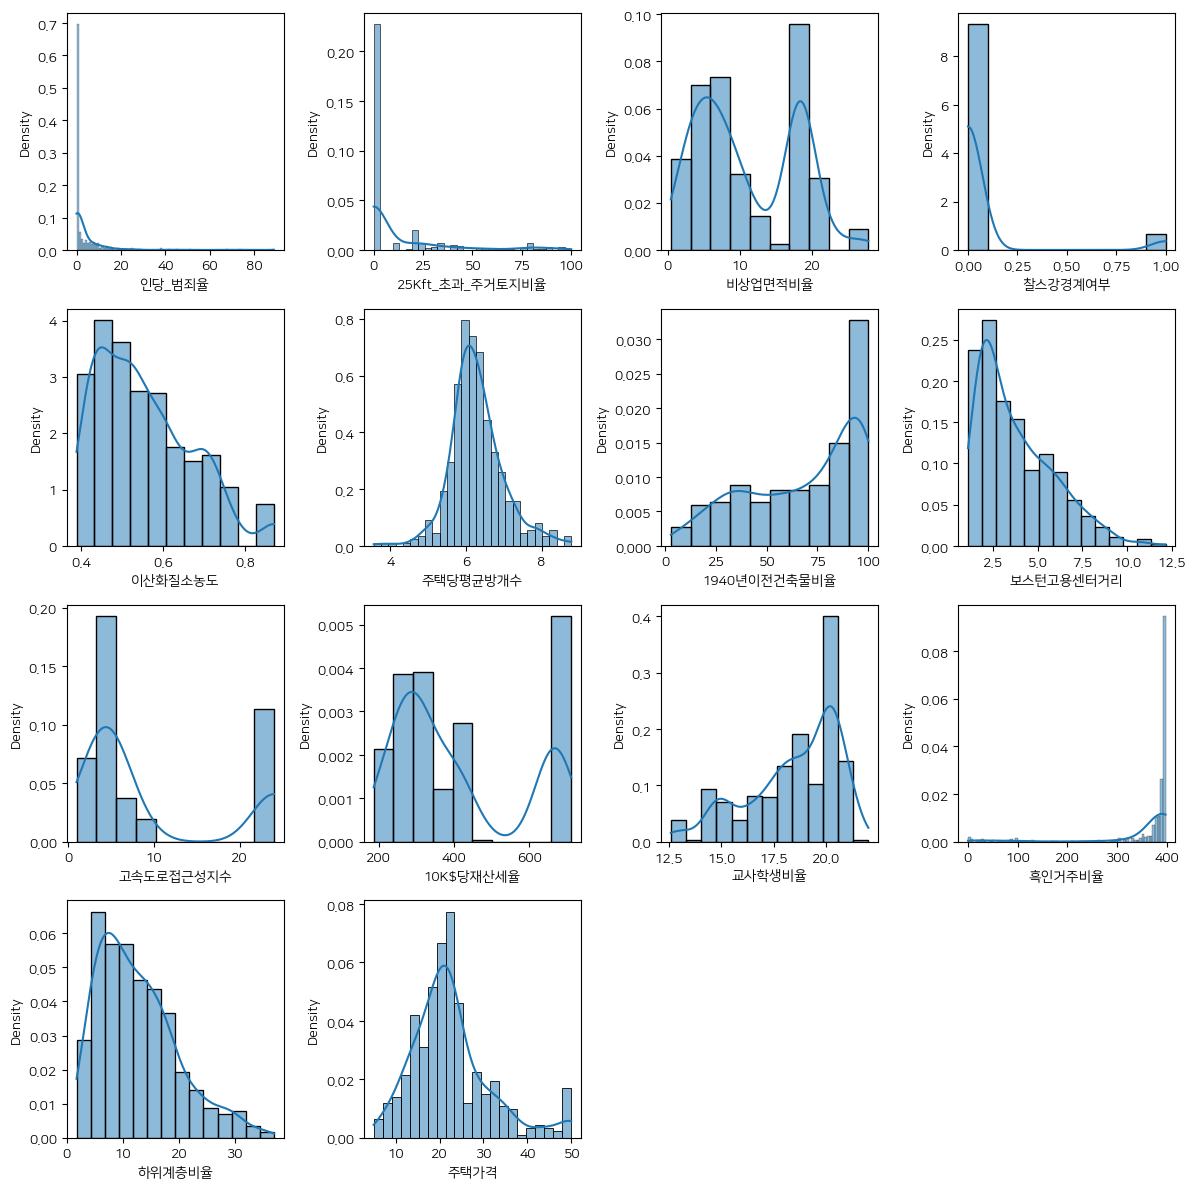

In [2]:
prep.plot_distribution()

- CRIM은 0이 대다수
- ZN은 0이 대다수

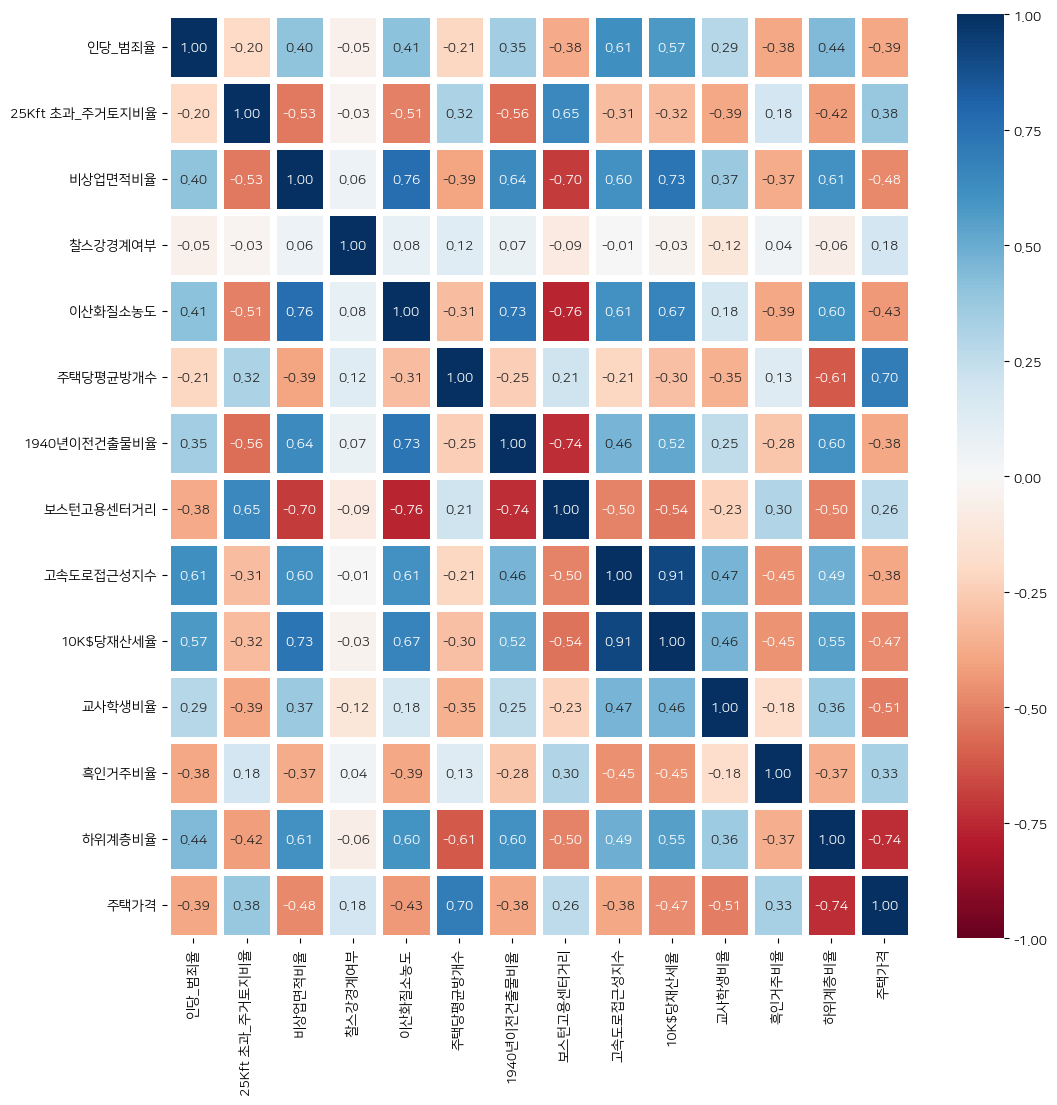

In [5]:
prep.plot_corr_heatmap()

### 불균형 데이터 집중 탐색하기: CRIM, B

<Axes: ylabel='Density'>

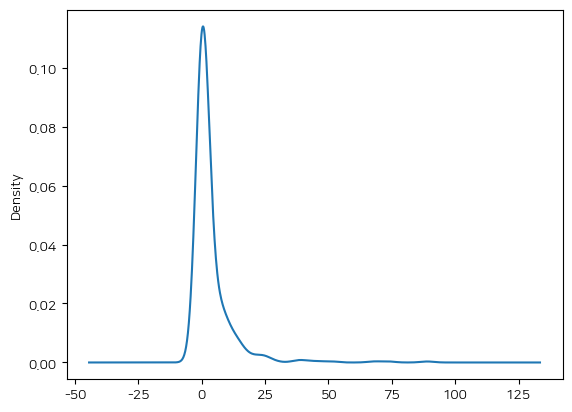

In [8]:
prep.data["인당_범죄율"].plot(kind="density")

- ~ 1 사이에 절반이 넘는 데이터가 몰려 있음

- 인당 범죄율이 0 이상/이하로 이산화해보자

In [9]:
prep.data = pd.concat([prep.data, pd.Series([1 if x >= 1 else 0 for x in prep.data["인당_범죄율"]], name="인당_범죄율_1이상")], axis=1)

<Axes: ylabel='Density'>

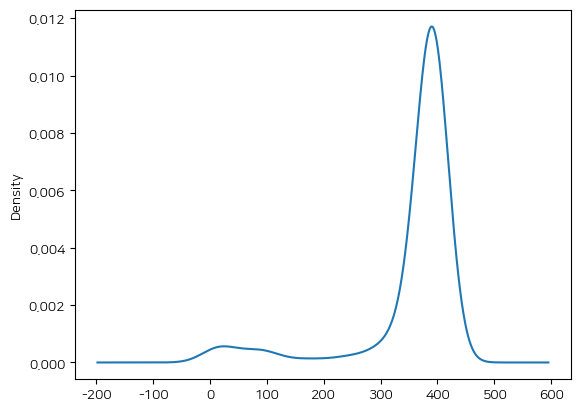

In [9]:
prep.data["흑인거주비율"].plot(kind="density")

- 마을 흑인 거주 비율이 300이 넘는지 아닌지로 이산화해보자

In [10]:
prep.data = pd.concat([prep.data, pd.Series([1 if x >= 300 else 0 for x in prep.data["흑인거주비율"]], name="흑인거주비율_높음")], axis=1)

#### 연관성을 다시 조사해보자

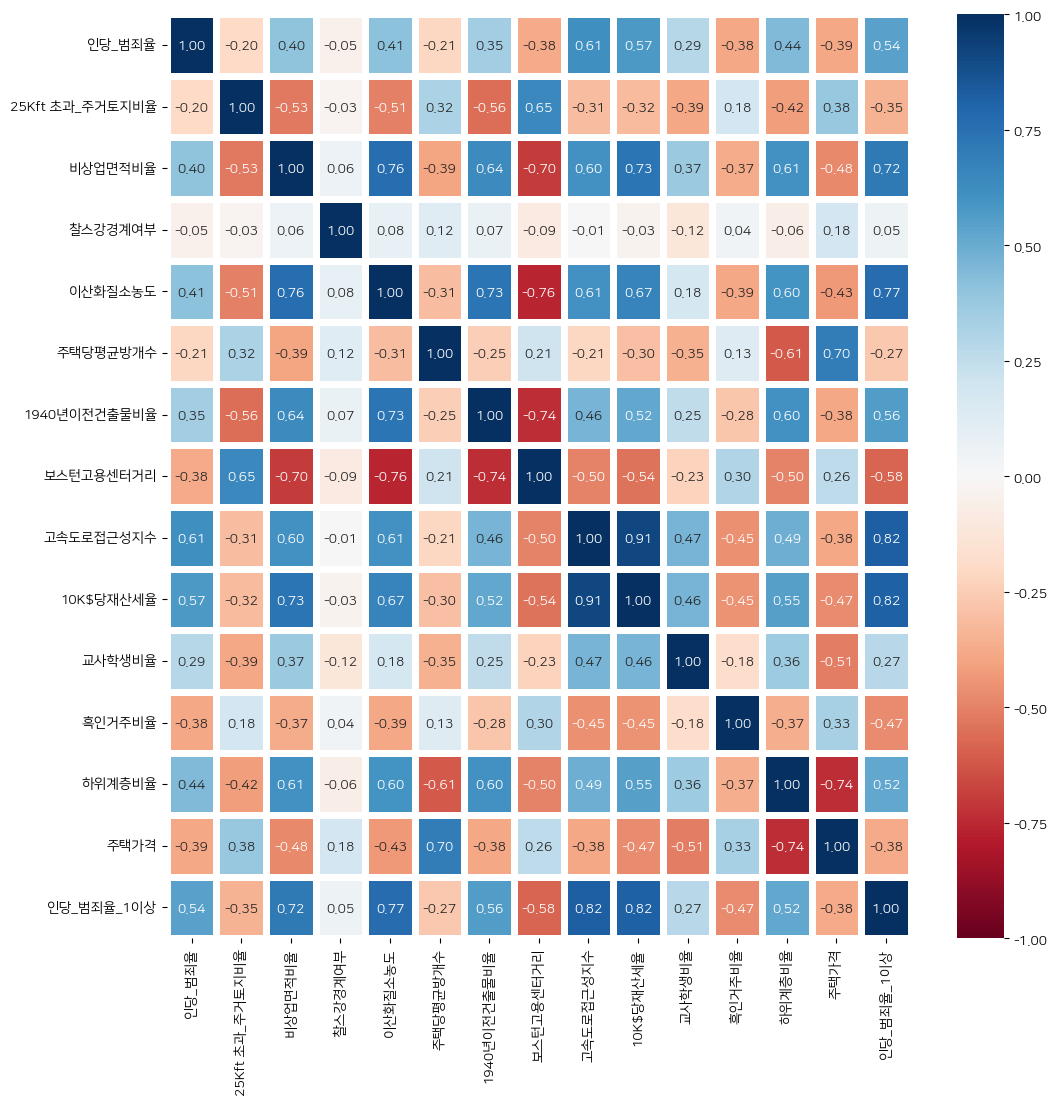

In [10]:
prep.plot_corr_heatmap()

- 인당 범죄율은 나눈 것이 조금 더 상관관계가 높게 되었음
- 흑인거주비율은 나눈 것과 차이가 크지 않음

In [11]:
prep.data = prep.data.drop("흑인거주비율_높음", axis=1)

#### 연관성 떨어지는 데이터 제거

In [12]:
prep.data = prep.data.drop("찰스강경계여부", axis=1)
prep.data = prep.data.drop("ID", axis=1)
prep.data = prep.data.drop("인당_범죄율", axis=1)

In [13]:
prep.scale("MinMaxScaler", exclude=["주택가격"])

c:\Users\gmela\src\handson_ml\preprocess.py:138: UserWarning: non-numeric data found, these datas will be ignored.
  warn("non-numeric data found, these datas will be ignored.")


# 전처리

In [3]:
from sklearn.preprocessing import PolynomialFeatures
from preprocess import Preprocess
import pandas as pd

import matplotlib.pyplot as plt

Preprocess_pipeline = {
    "drop": {
        "labels": ["찰스강경계여부", "ID", "인당_범죄율"],
        "axis": 1,
    },

    "get_polynormial_features": {
        "degree": 6,
        "exclude": ["주택가격"]
    },

    "scale": {
        "method": "MinMaxScaler",
        "exclude": ["주택가격"],
    }
}

prep = Preprocess(pd.read_csv("./data/boston/train.csv"), categorial_threshold=30)

prep.data = pd.concat([prep.data, pd.Series([1 if x >= 1 else 0 for x in prep.data["인당_범죄율"]], name="인당_범죄율_1이상")], axis=1)
prep.set_pipeline(Preprocess_pipeline)
prep.execute_pipeliine()

X_train, X_test, y_train, y_test = prep.train_test_split("주택가격", test_size=0.2, stratify=False)


/home/gmelan/src/handson_ml/preprocess.py:216: UserWarning: non-numeric data found, these datas will be ignored.
  warn("non-numeric data found, these datas will be ignored.")


# 모델 선택

In [1]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
# from sklearn.ensemble import RandomForestRegressor

import numpy as np
best = {
    "params": [],
    "score": 10000,
}

grid = RandomizedSearchCV(
    SVR(),
    param_distributions= {
        "kernel": ["rbf"],
        "C": np.arange(0.001, 1000, 1),
        "gamma": np.arange(1e-30, 1e-8, 1e-1),
        "tol": np.arange(1e-30, 1e-1, 1e-1),
    },
    verbose=1,
    n_jobs=-1,
    cv=3,
    scoring="neg_mean_squared_error",
    n_iter=500
    )
    
grid.fit(X_train, y_train)

score = mean_squared_error(y_test, grid.predict(X_test))

best["score"] = score
best["params"] = grid.best_params_

best

NameError: name 'X_train' is not defined

In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rfs = RandomForestRegressor(criterion="absolute_error")
rfs.fit(X_train, y_train)

mean_squared_error(y_test, rfs.predict(X_test))

11.090732939560429

In [2]:
# {'params': {'gamma': 1e-05, 'C': 1863}, 'score': 11.438534263920117}
#{'params': {'gamma': 9.100000000000003e-06, 'C': 2193}, 'score': 11.440126747530305}
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

svr = SVR(**{'kernel': 'rbf', 'gamma': 1e-05, 'C': 4555.67,})

svr.fit(X_train, y_train)
mean_squared_error(y_test, svr.predict(X_test))

15.747191029710253

In [18]:
from hyperopt import fmin, hp, STATUS_OK, tpe, Trials
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

search_space = {
    "kernel": "rbf",
    "C": hp.quniform("C", 143.2, 143.8, 0.0001),
    "gamma": hp.uniform("gamma", 1e-5, 1e-1),
    "tol": hp.uniform("tol", 1e-5, 1e-1),
}


def objective(params):
    svr = SVR(**params).fit(X_train, y_train)
    score = mean_squared_error(y_test, svr.predict(X_test))

    return {"loss": score, "status": STATUS_OK}

trials = Trials()

best = fmin(
    fn=objective,
    space=search_space,
    algo=tpe.suggest,
    trials=trials,
    max_evals=100,
)


100%|██████████| 100/100 [00:48<00:00,  2.07trial/s, best loss: 10.708006124737025]


In [19]:
trials.best_trial["result"]["loss"]

10.708006124737025

In [20]:
best

{'C': 143.5178, 'gamma': 0.0005179469573053388, 'tol': 0.04233369259663422}

In [21]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

svr = SVR(**{'C': 143.5178, 'gamma': 0.0005179469573053388, 'tol': 0.04233369259663422})

svr.fit(X_train, y_train)
mean_squared_error(y_test, svr.predict(X_test))

10.708006124737025

In [6]:
prep_test = Preprocess(pd.read_csv("./data/boston/test.csv"), categorial_threshold=10)

prep_test.data = pd.concat([prep_test.data, pd.Series([1 if x >= 1 else 0 for x in prep_test.data["인당_범죄율"]], name="인당_범죄율_1이상")], axis=1)

Preprocess_pipeline = {
    "drop": {
        "labels": ["찰스강경계여부", "ID", "인당_범죄율"],
        "axis": 1,
    },

    "get_polynormial_features": {
        "degree": 5,
    },

    "scale": {
        "method": "RobustScaler",
    }
}

prep_test.submit(
    model=rfs,
    preprocess_args=Preprocess_pipeline,
    path="./data/boston/",
    example_file_name="sample_submission.csv",
    export_file_name="submit/rfs_random.csv",
    target="MEDV",
    )

# 파라미터 최적화

In [42]:
from hyperopt_regression import get_best_params

best, score = get_best_params(X_train, y_train, scoring="neg_mean_squared_error", estimators=["RandomForestRegressor"], max_evals=10, cv=3, early_stop=None)

getting scores... 1 / 1 - RandomForestRegressor
  0%|          | 0/10 [00:06<?, ?trial/s, best loss=?]


KeyboardInterrupt: 

In [ ]:
best["args"][0]["min_samples_split"] = int(best["args"][0]["min_samples_split"])
best["args"][0]["n_estimators"] = int(best["args"][0]["n_estimators"])
best

{'regressor': ['RandomForestRegressor'],
 'args': [{'criterion': 'absolute_error',
   'max_depth': 9,
   'max_features': 'sqrt',
   'min_samples_split': 3,
   'n_estimators': 200}]}

In [11]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(**best["args"][0])
model.fit(X_train, y_train)

RandomForestRegressor(criterion='absolute_error', max_depth=9,
                      max_features='sqrt', min_samples_split=3,
                      n_estimators=200)

# 제출

In [22]:
prep_test = Preprocess(pd.read_csv("./data/boston/test.csv"), categorial_threshold=10)

prep_test.data = pd.concat([prep_test.data, pd.Series([1 if x >= 1 else 0 for x in prep_test.data["인당_범죄율"]], name="인당_범죄율_1이상")], axis=1)

Preprocess_pipeline = {
    "drop": {
        "labels": ["찰스강경계여부", "ID", "인당_범죄율"],
        "axis": 1,
    },

    "get_polynormial_features": {
        "degree": 6,
    },

    "scale": {
        "method": "MinMaxScaler",
    }
}

prep_test.submit(
    model=svr,
    preprocess_args=Preprocess_pipeline,
    path="./data/boston/",
    example_file_name="sample_submission.csv",
    export_file_name="submit/svr_rbf_hand_optimized.csv",
    target="MEDV",
    )

/home/gmelan/src/handson_ml/preprocess.py:216: UserWarning: non-numeric data found, these datas will be ignored.
  warn("non-numeric data found, these datas will be ignored.")
